# Business Case: 
#                     Predicting the price range of the Flight Fare considering the different features given in the data

# Tasks :
# Task 1:-Prepare a complete data analysis report on the given data.
# Task 2:-Create a predictive model which will help the customers to predict future flight prices and plan their journey accordingly.

# Importing Libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset:

In [2]:
df=pd.read_excel('Flight_Fare.xlsx')
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


# Domain Analysis:

# Task 1:-Prepare a complete data analysis report on the given data.

# Basic Checks 

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [5]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


There are no missing values in this data

In [7]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

There are two null values present in this data, so we need to remove both the null values.

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

Now there are no null values in the data.

In [10]:
df.describe(include=['O'])

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10682,10682,10682,10682,10682,10682,10682,10682,10682,10682
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4536,4536,2376,233,423,550,5625,8344


In [11]:
df.duplicated().sum()

220

Comparing the duplicated values with the data there are only a minimum number of duplicated values, So we can leave or we don't want to handle the duplicated values and also removal of duplicated values may result in the loss of important datas.Retaining duplicates can enhance the accuracy and effectiveness of your flight fare prediction model.

In [12]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

Here the Date of Journey, Arrival_Time and Dep_Time is in object type, so firstly we need to convert this into proper date and time type for proper prediction.

In [13]:
date_time_col=['Date_of_Journey','Arrival_Time','Dep_Time']
for column in date_time_col:
    df[column]=pd.to_datetime(df[column])

In [14]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

# Exploratory Data Analysis:

# UNIVARIATE ANALYSIS:

In [15]:
# categorical columns
cat_col=df[['Source','Destination','Total_Stops','Airline','Additional_Info']]
#Numerical columns
num_col=df[['Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration',]]

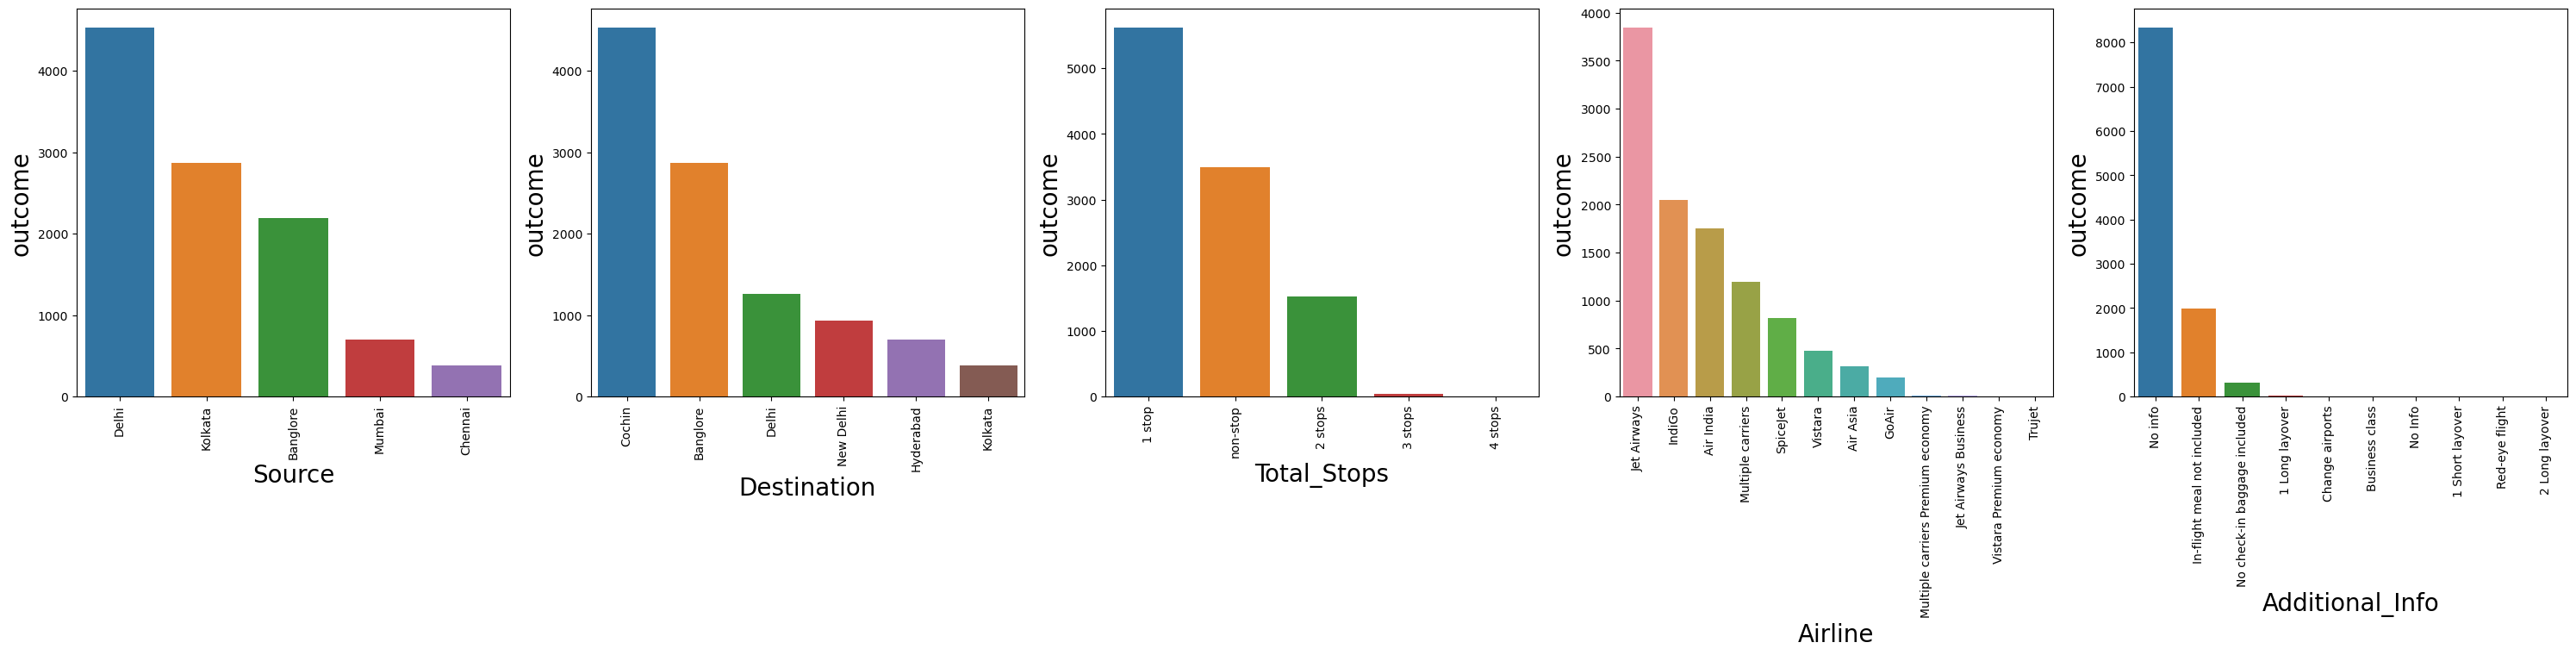

In [16]:
# Count plot 
plt.figure(figsize=(30,35),facecolor='white')
plotnumber=1

for column in cat_col:
        ax=plt.subplot(5,5,plotnumber)
        sns.countplot(x=column,data=cat_col,order=cat_col[column].value_counts().index)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('outcome',fontsize=20)
        plt.xticks(rotation=90)
        plotnumber+=1
plt.tight_layout()
plt.show()

# Insights

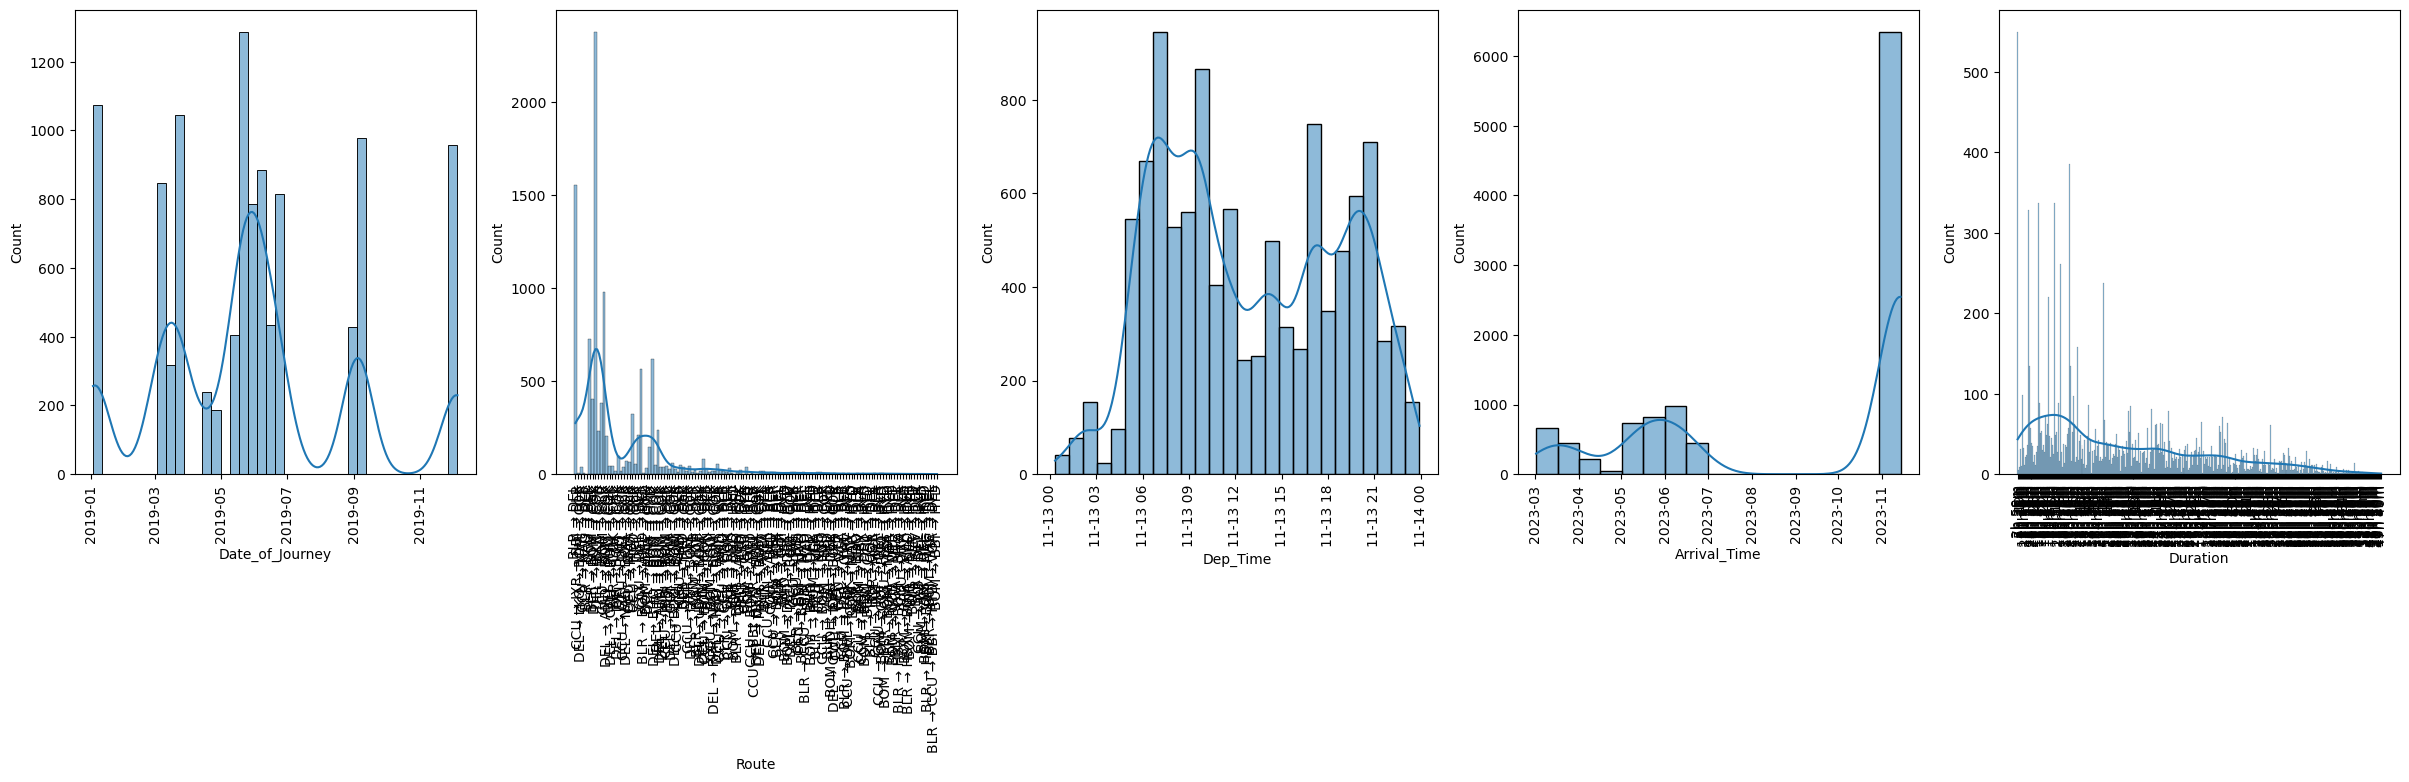

In [17]:
plt.figure(figsize=(30,35))
plotnumber=1

for column in num_col:
        ax=plt.subplot(5,5,plotnumber)
        sns.histplot(x=df[column],kde=True)
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=90)
        plotnumber+=1
plt.tight_layout
plt.show()

Insights:
      It is evident that the graph is overlapping significantly making it difficult to understand the clear distribution.

# BIVARIATE ANALYSIS:

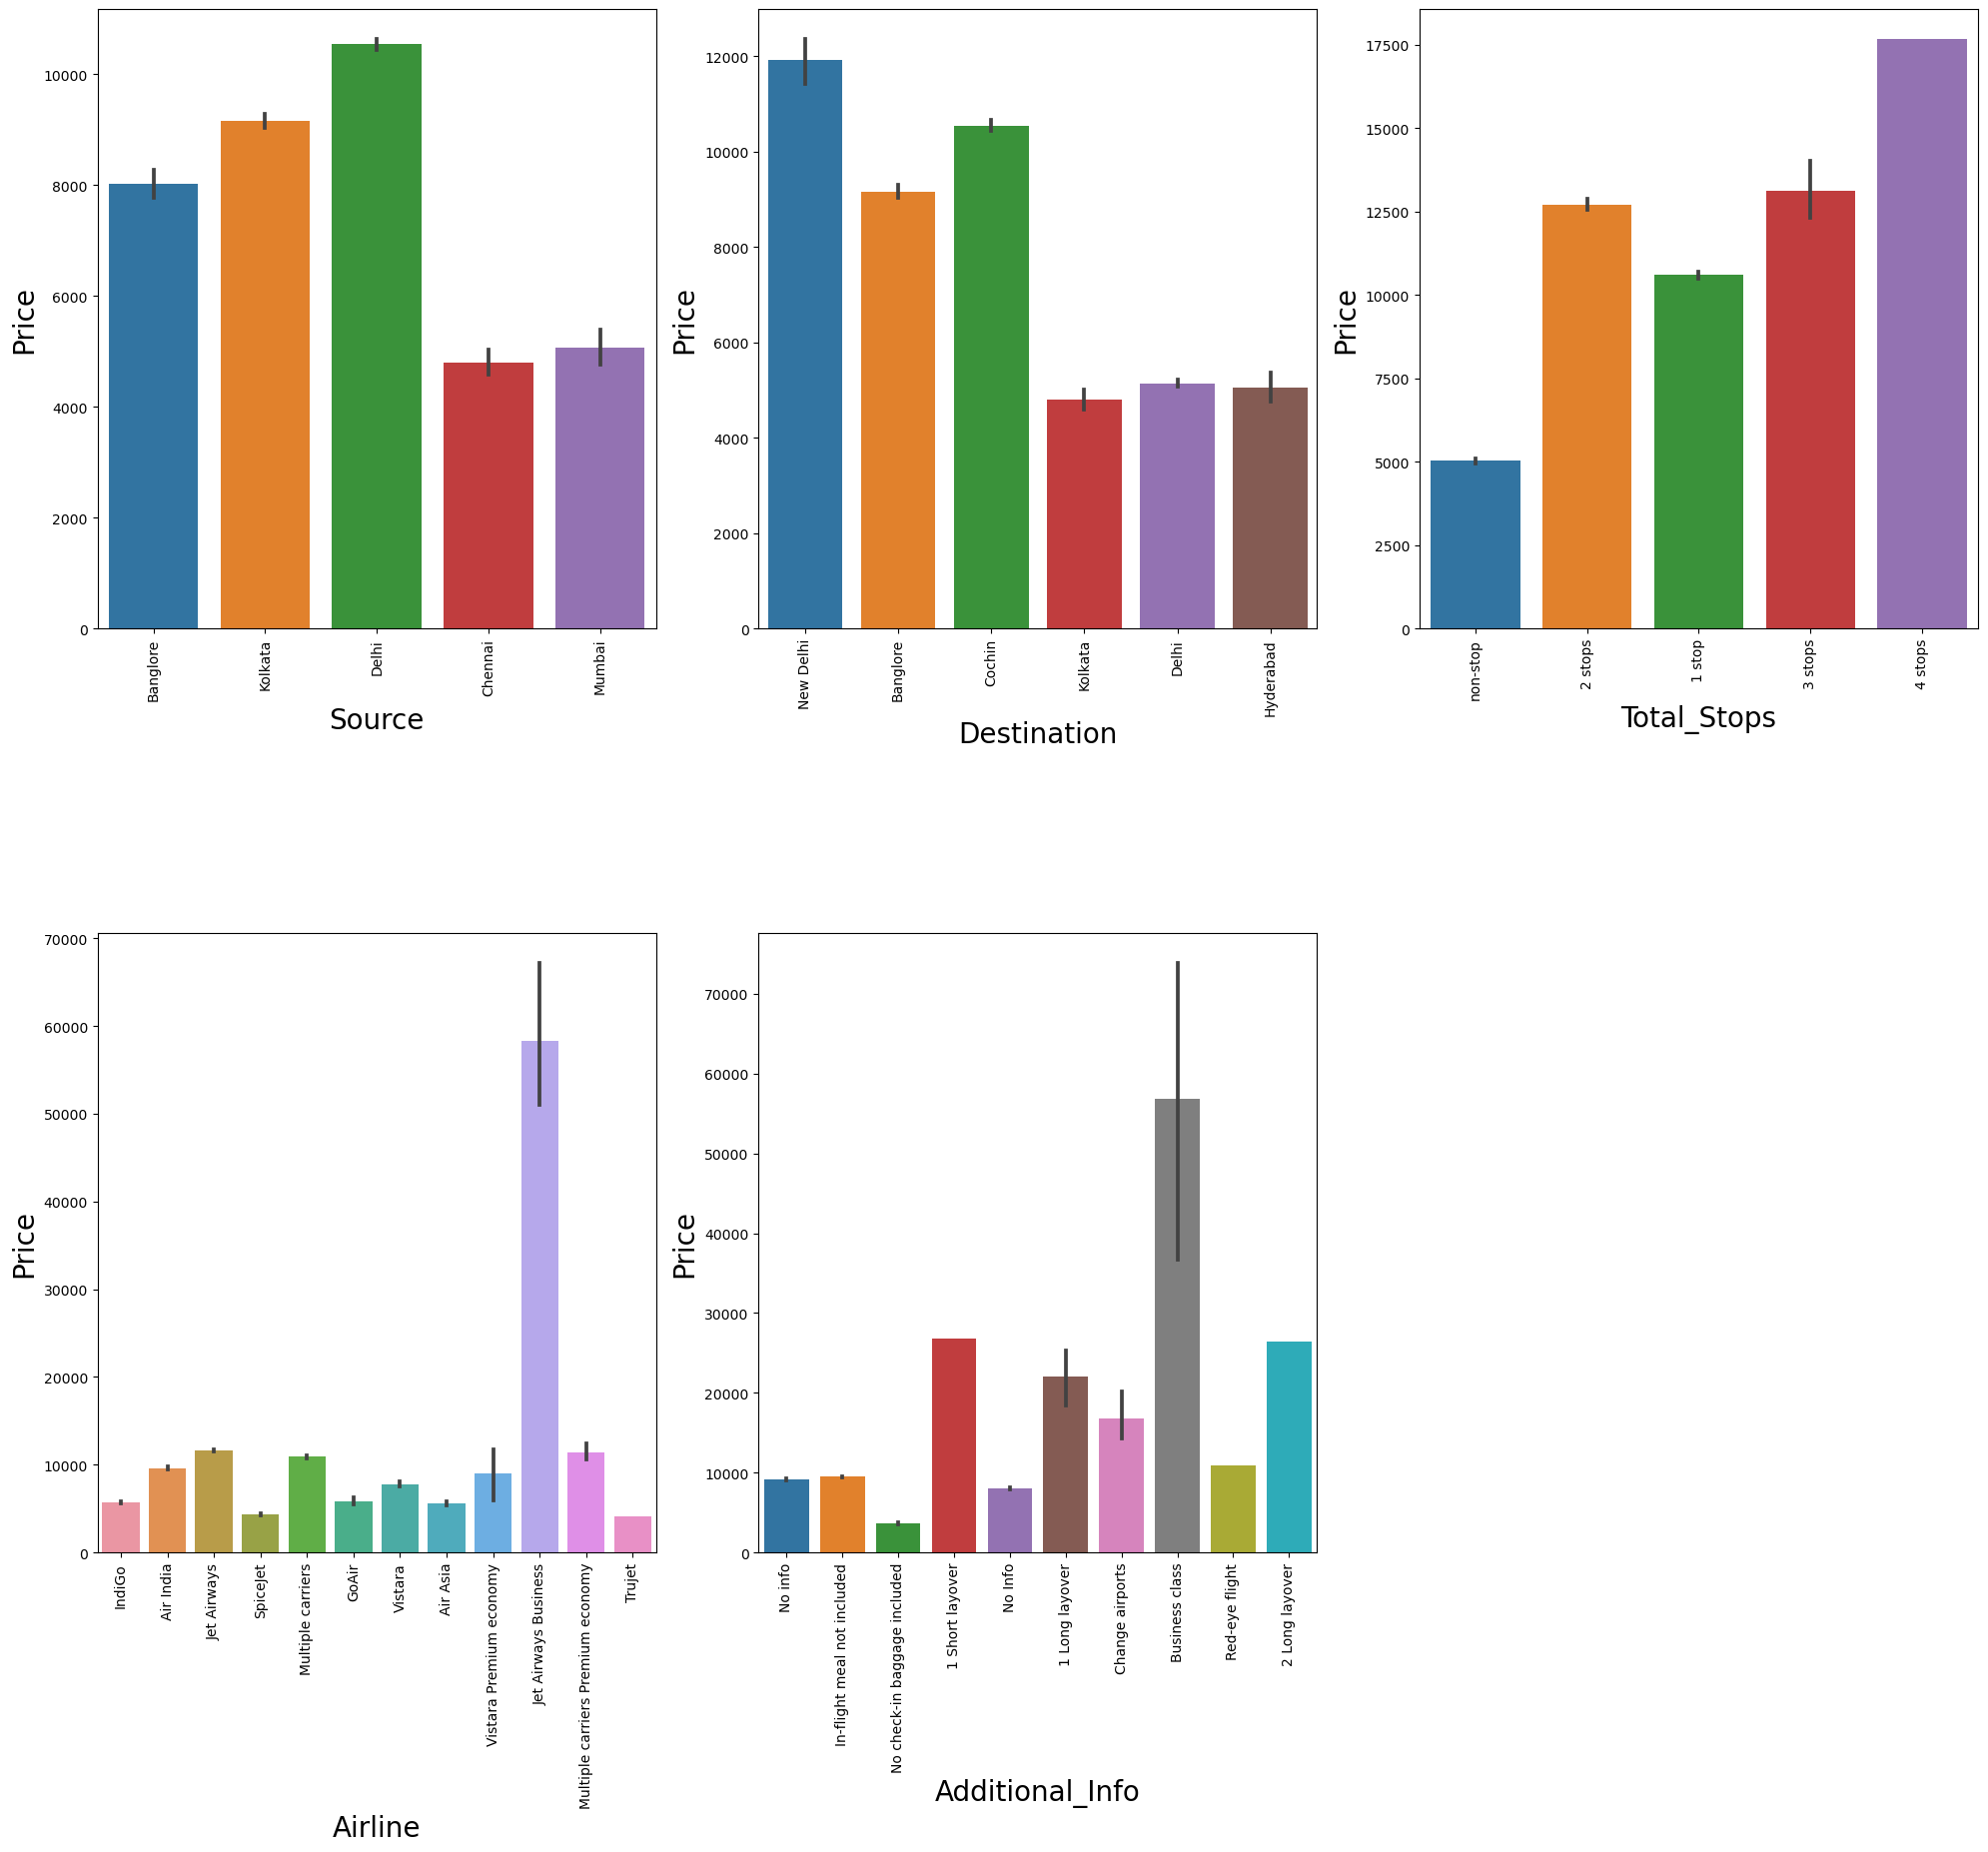

In [18]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in cat_col:
        ax= plt.subplot(3,3,plotnumber)
        sns.barplot(x=df[column],y=df['Price'])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Price',fontsize=20)
        plt.xticks(rotation=90)
        plotnumber+=1
plt.tight_layout()

# Insights:

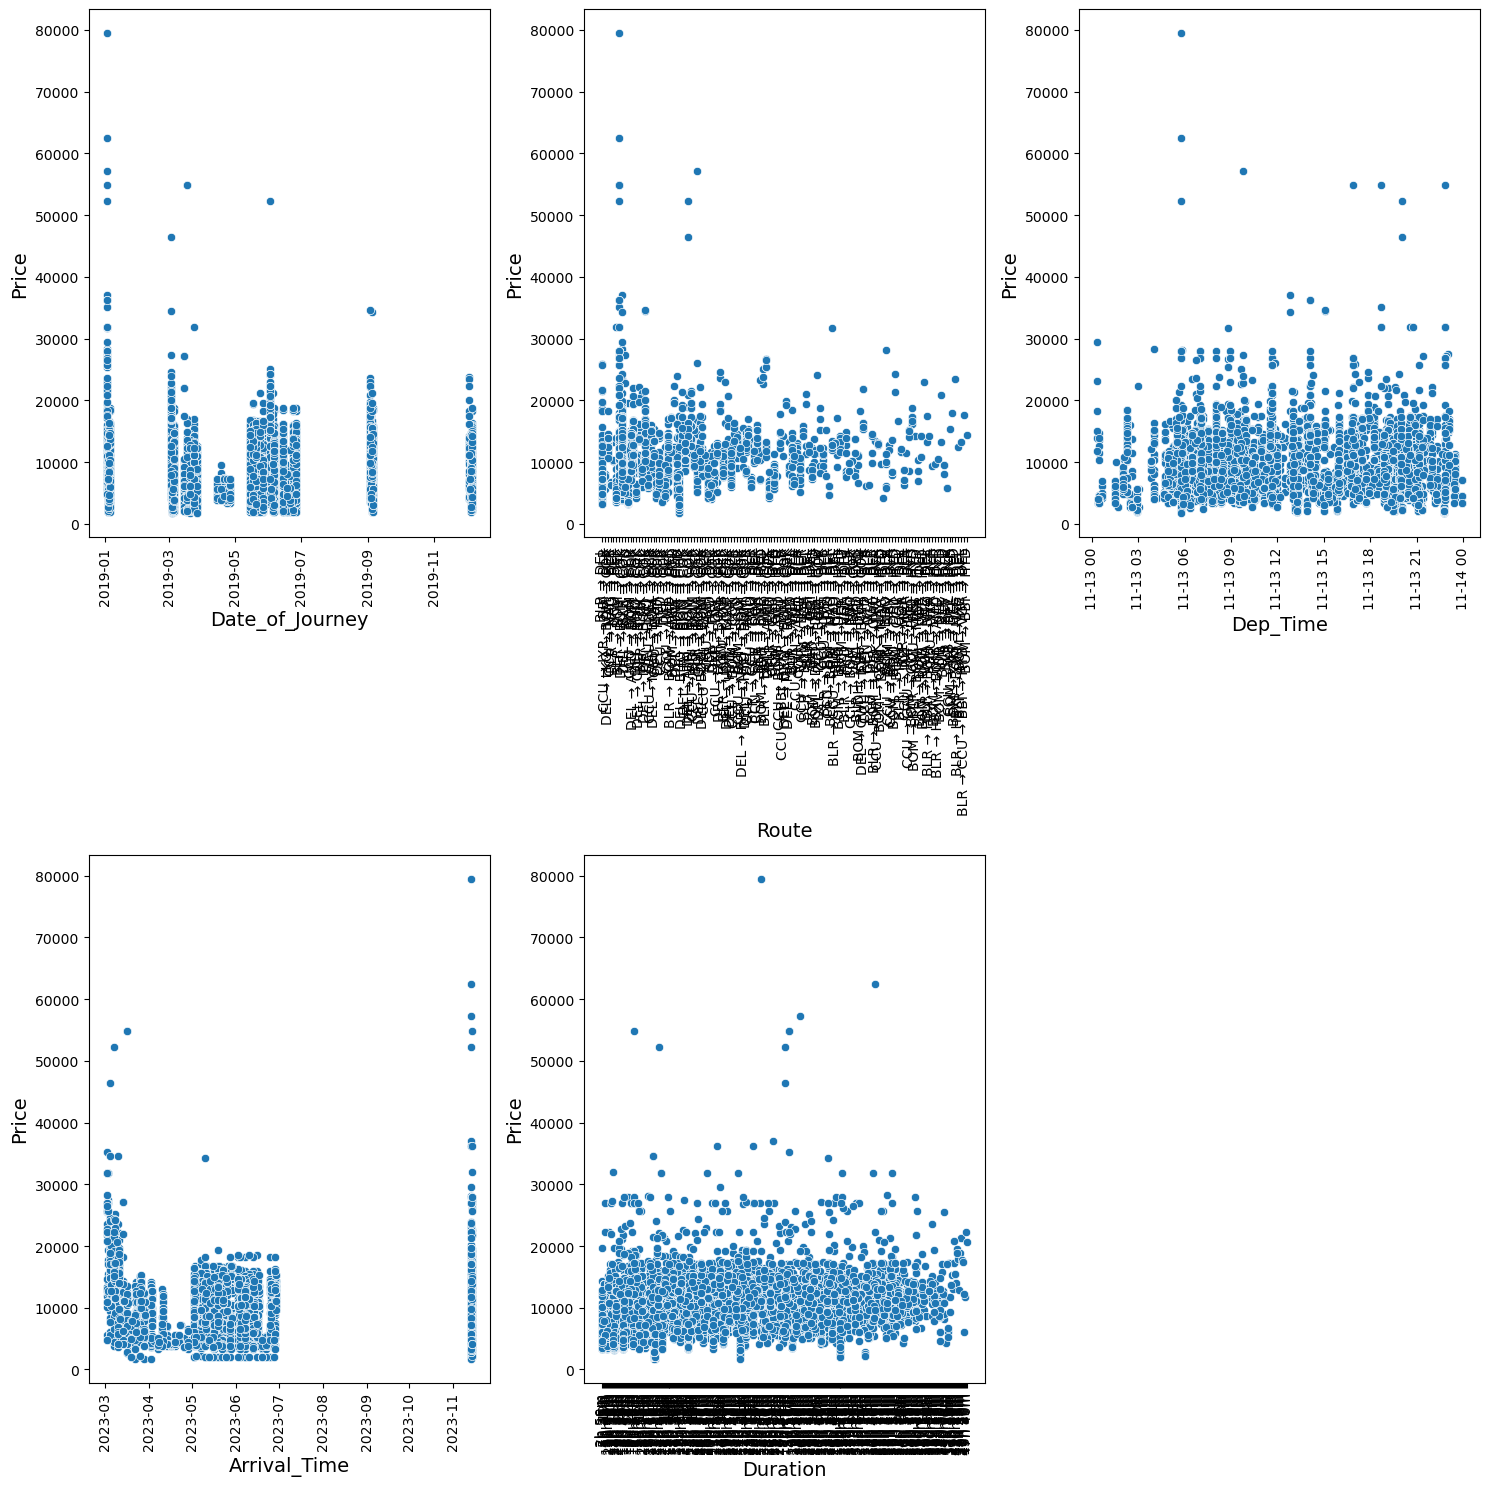

In [19]:
# Scatter plot
plt.figure(figsize = (15, 15))
plotnumber = 1
for i in num_col:
    plt.subplot(2, 3, plotnumber)
    sns.scatterplot(x = df[i], y = df.Price)
    plt.xlabel(i, fontsize = 14)
    plt.ylabel('Price', fontsize = 14)
    plotnumber+=1
    plt.xticks(rotation=90)
plt.tight_layout()

There are no links between any of these features.

# DATA PREPROCESSING:

In [20]:
# To extract the 'Date_of_Journey' column into new columns 'Day' and 'Month' for prediction purposes

In [21]:
df['Day']=df.Date_of_Journey.dt.day

In [22]:
df['Month']=df['Date_of_Journey'].dt.month

In [23]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-11-13 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-11-13 05:50:00,2023-11-13 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2023-11-13 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2023-11-13 18:05:00,2023-11-13 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2023-11-13 16:50:00,2023-11-13 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [24]:
df.drop('Date_of_Journey',axis=1,inplace=True)

In [25]:
#  To extract the 'Dep_time' column into new columns 'Dep_hour' and 'Dep_min for prediction purposes

In [26]:
df['Dep_Hour']=df['Dep_Time'].dt.hour

In [27]:
df['Dep_Minute']=df['Dep_Time'].dt.minute

In [28]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Dep_Hour,Dep_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-11-13 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-11-13 05:50:00,2023-11-13 13:15:00,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2023-11-13 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2023-11-13 18:05:00,2023-11-13 23:30:00,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2023-11-13 16:50:00,2023-11-13 21:35:00,4h 45m,1 stop,No info,13302,3,1,16,50


Now the Dep_Time has been changed to Dep-Hour and Dep_Minute so now we can remove the actual Dep_Time

In [29]:
df.drop('Dep_Time',axis=1,inplace=True)

In [30]:
df['Arrival_Hour']=df['Arrival_Time'].dt.hour

In [31]:
df['Arrival_Minute']=df['Arrival_Time'].dt.minute

In [32]:
df.drop('Arrival_Time',axis=1,inplace=True)

In [33]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


Arrival_Time column has been changed into Hour and Minute format.

In [34]:
df['Duration']=pd.to_timedelta(df['Duration']).dt.total_seconds()

In [35]:
df['Duration_min']=df['Duration']/60

In [36]:
df.drop('Duration',inplace=True,axis=1)

In [37]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day,Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,170.0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,445.0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,1140.0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,325.0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,285.0


Here in this data Every column has been changed into proper Hour and minute format for Better prediction.

In [38]:
df1=df.copy()

In [39]:
df1

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day,Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,170.0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,445.0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,1140.0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,325.0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,285.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,4,9,19,55,22,25,150.0
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,20,45,23,20,155.0
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,8,20,11,20,180.0
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,3,1,11,30,14,10,160.0


# Extraction of Categorical into Numerical Columns:

In [40]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

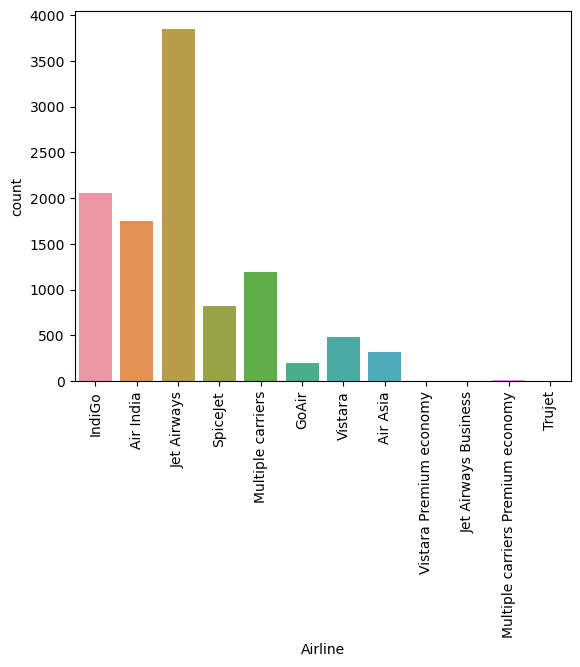

In [41]:
sns.countplot(x='Airline',data=df1)
plt.xticks(rotation=90)

In [42]:
# onehot Encoding:
data1=pd.get_dummies(df1['Airline'],prefix='Airline',drop_first=True)
df1=pd.concat([data1,df1],axis=1).drop(['Airline'],axis=1)

In [43]:
df1

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,...,Total_Stops,Additional_Info,Price,Day,Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_min
0,0,0,1,0,0,0,0,0,0,0,...,non-stop,No info,3897,24,3,22,20,1,10,170.0
1,1,0,0,0,0,0,0,0,0,0,...,2 stops,No info,7662,5,1,5,50,13,15,445.0
2,0,0,0,1,0,0,0,0,0,0,...,2 stops,No info,13882,6,9,9,25,4,25,1140.0
3,0,0,1,0,0,0,0,0,0,0,...,1 stop,No info,6218,5,12,18,5,23,30,325.0
4,0,0,1,0,0,0,0,0,0,0,...,1 stop,No info,13302,3,1,16,50,21,35,285.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,...,non-stop,No info,4107,4,9,19,55,22,25,150.0
10679,1,0,0,0,0,0,0,0,0,0,...,non-stop,No info,4145,27,4,20,45,23,20,155.0
10680,0,0,0,1,0,0,0,0,0,0,...,non-stop,No info,7229,27,4,8,20,11,20,180.0
10681,0,0,0,0,0,0,0,0,0,1,...,non-stop,No info,12648,3,1,11,30,14,10,160.0


# Conversion of Categorical to Numerical values for Source:

In [44]:
df1['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [45]:
data2=pd.get_dummies(df1['Source'],prefix='Source',drop_first=True)
df1=pd.concat([data2,df1],axis=1)

In [46]:
df1

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,...,Total_Stops,Additional_Info,Price,Day,Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_min
0,0,0,0,0,0,0,1,0,0,0,...,non-stop,No info,3897,24,3,22,20,1,10,170.0
1,0,0,1,0,1,0,0,0,0,0,...,2 stops,No info,7662,5,1,5,50,13,15,445.0
2,0,1,0,0,0,0,0,1,0,0,...,2 stops,No info,13882,6,9,9,25,4,25,1140.0
3,0,0,1,0,0,0,1,0,0,0,...,1 stop,No info,6218,5,12,18,5,23,30,325.0
4,0,0,0,0,0,0,1,0,0,0,...,1 stop,No info,13302,3,1,16,50,21,35,285.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,1,0,0,0,0,0,0,0,...,non-stop,No info,4107,4,9,19,55,22,25,150.0
10679,0,0,1,0,1,0,0,0,0,0,...,non-stop,No info,4145,27,4,20,45,23,20,155.0
10680,0,0,0,0,0,0,0,1,0,0,...,non-stop,No info,7229,27,4,8,20,11,20,180.0
10681,0,0,0,0,0,0,0,0,0,0,...,non-stop,No info,12648,3,1,11,30,14,10,160.0


In [47]:
df1.drop('Source',axis=1,inplace=True)

# Conversion of Categorical to Numerical values for Destination:

In [48]:
df1['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [49]:
data3=pd.get_dummies(df1['Destination'],prefix='Destination',drop_first=True)
df1=pd.concat([data3,df1],axis=1).drop(['Destination'],axis=1)

In [50]:
df1

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Airline_Air India,...,Total_Stops,Additional_Info,Price,Day,Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_min
0,0,0,0,0,1,0,0,0,0,0,...,non-stop,No info,3897,24,3,22,20,1,10,170.0
1,0,0,0,0,0,0,0,1,0,1,...,2 stops,No info,7662,5,1,5,50,13,15,445.0
2,1,0,0,0,0,0,1,0,0,0,...,2 stops,No info,13882,6,9,9,25,4,25,1140.0
3,0,0,0,0,0,0,0,1,0,0,...,1 stop,No info,6218,5,12,18,5,23,30,325.0
4,0,0,0,0,1,0,0,0,0,0,...,1 stop,No info,13302,3,1,16,50,21,35,285.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,1,0,0,...,non-stop,No info,4107,4,9,19,55,22,25,150.0
10679,0,0,0,0,0,0,0,1,0,1,...,non-stop,No info,4145,27,4,20,45,23,20,155.0
10680,0,1,0,0,0,0,0,0,0,0,...,non-stop,No info,7229,27,4,8,20,11,20,180.0
10681,0,0,0,0,1,0,0,0,0,0,...,non-stop,No info,12648,3,1,11,30,14,10,160.0


# Conversion of Categorical to Numerical values for Total_Stops:

In [51]:
df1['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [52]:
data4=pd.get_dummies(df1['Total_Stops'],prefix='Total_Stops',drop_first=True)
df1=pd.concat([data4,df1],axis=1).drop(['Total_Stops'],axis=1)

In [53]:
df1

,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Source_Chennai,...,Route,Additional_Info,Price,Day,Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_min
0,0,0,0,1,0,0,0,0,1,0,...,BLR → DEL,No info,3897,24,3,22,20,1,10,170.0
1,1,0,0,0,0,0,0,0,0,0,...,CCU → IXR → BBI → BLR,No info,7662,5,1,5,50,13,15,445.0
2,1,0,0,0,1,0,0,0,0,0,...,DEL → LKO → BOM → COK,No info,13882,6,9,9,25,4,25,1140.0
3,0,0,0,0,0,0,0,0,0,0,...,CCU → NAG → BLR,No info,6218,5,12,18,5,23,30,325.0
4,0,0,0,0,0,0,0,0,1,0,...,BLR → NAG → DEL,No info,13302,3,1,16,50,21,35,285.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,1,0,0,0,0,0,0,...,CCU → BLR,No info,4107,4,9,19,55,22,25,150.0
10679,0,0,0,1,0,0,0,0,0,0,...,CCU → BLR,No info,4145,27,4,20,45,23,20,155.0
10680,0,0,0,1,0,1,0,0,0,0,...,BLR → DEL,No info,7229,27,4,8,20,11,20,180.0
10681,0,0,0,1,0,0,0,0,1,0,...,BLR → DEL,No info,12648,3,1,11,30,14,10,160.0


# # Conversion of Categorical to Numerical values for Additional_Info:

In [54]:
df1['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'No info'),
  Text(1, 0, 'In-flight meal not included'),
  Text(2, 0, 'No check-in baggage included'),
  Text(3, 0, '1 Short layover'),
  Text(4, 0, 'No Info'),
  Text(5, 0, '1 Long layover'),
  Text(6, 0, 'Change airports'),
  Text(7, 0, 'Business class'),
  Text(8, 0, 'Red-eye flight'),
  Text(9, 0, '2 Long layover')])

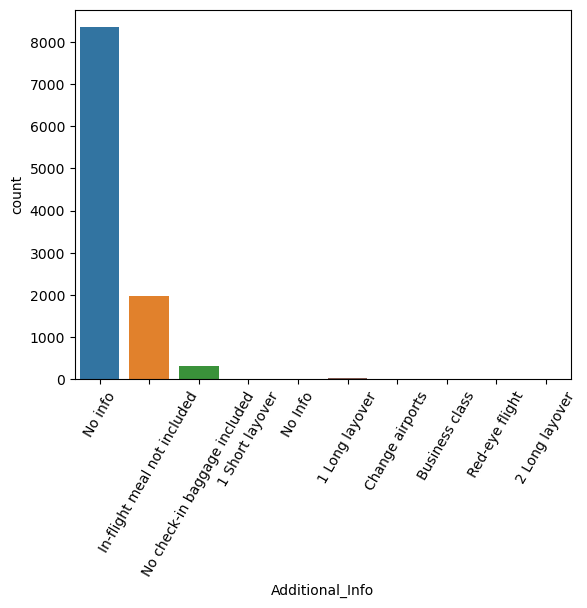

In [55]:
sns.countplot(x='Additional_Info',data=df1)
plt.xticks(rotation=60)

In [56]:
df1.drop('Additional_Info',axis=1,inplace=True)

In [57]:
df1

,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Source_Chennai,...,Airline_Vistara Premium economy,Route,Price,Day,Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_min
0,0,0,0,1,0,0,0,0,1,0,...,0,BLR → DEL,3897,24,3,22,20,1,10,170.0
1,1,0,0,0,0,0,0,0,0,0,...,0,CCU → IXR → BBI → BLR,7662,5,1,5,50,13,15,445.0
2,1,0,0,0,1,0,0,0,0,0,...,0,DEL → LKO → BOM → COK,13882,6,9,9,25,4,25,1140.0
3,0,0,0,0,0,0,0,0,0,0,...,0,CCU → NAG → BLR,6218,5,12,18,5,23,30,325.0
4,0,0,0,0,0,0,0,0,1,0,...,0,BLR → NAG → DEL,13302,3,1,16,50,21,35,285.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,1,0,0,0,0,0,0,...,0,CCU → BLR,4107,4,9,19,55,22,25,150.0
10679,0,0,0,1,0,0,0,0,0,0,...,0,CCU → BLR,4145,27,4,20,45,23,20,155.0
10680,0,0,0,1,0,1,0,0,0,0,...,0,BLR → DEL,7229,27,4,8,20,11,20,180.0
10681,0,0,0,1,0,0,0,0,1,0,...,0,BLR → DEL,12648,3,1,11,30,14,10,160.0


# Feature Engineering:

In [58]:
# drop the Route because already cover all the data from other columns
df1.drop('Route',axis=1,inplace=True)

In [59]:
# checking correlation
# Correlation Only for Continous Data so We extract the continous data for correlation  and also drop the target
Corr_data=df1[['Day','Month','Dep_Hour','Dep_Minute','Arrival_Hour','Arrival_Minute','Duration_min']]

In [60]:
Corr_data.corr()

,Day,Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_min
Day,1.000000,-0.264896,-0.002301,-0.016433,-0.002176,-0.021423,-0.038360
Month,-0.264896,1.000000,0.028189,0.002136,-0.004329,-0.025786,0.055136
Dep_Hour,-0.002301,0.028189,1.000000,-0.024745,0.005180,0.067911,0.002088
Dep_Minute,-0.016433,0.002136,-0.024745,1.000000,0.043122,-0.017597,-0.019099
Arrival_Hour,-0.002176,-0.004329,0.005180,0.043122,1.000000,-0.154363,0.051531
Arrival_Minute,-0.021423,-0.025786,0.067911,-0.017597,-0.154363,1.000000,-0.069663
Duration_min,-0.038360,0.055136,0.002088,-0.019099,0.051531,-0.069663,1.000000


Text(0.5, 1.0, 'Correlation between the features')

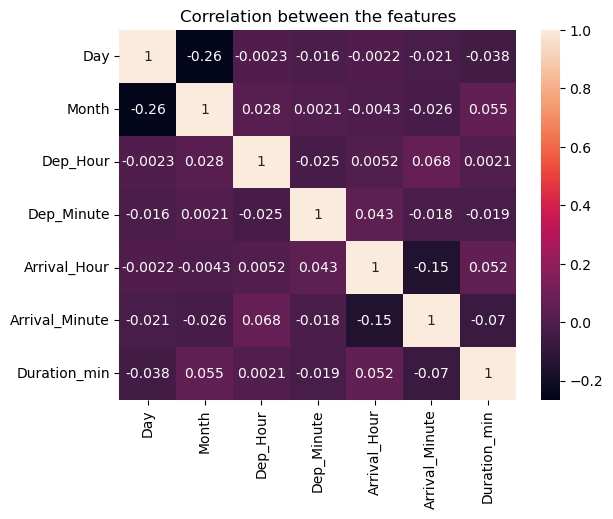

In [61]:
sns.heatmap(Corr_data.corr(),annot=True)
plt.title("Correlation between the features")

There are no highly Corelated values present in the data.

# DATA ANALYSIS:

# Model Creation

In [119]:
# Splitting x and y 
x=df1.drop('Price',axis=1)
y=df1[['Price']]

In [120]:
# importing train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.30)

# Linear Regression:

In [121]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [122]:
lr.fit(x_train,y_train)

LinearRegression()

In [123]:
y_pred=lr.predict(x_test)

# Model Evaluation:

In [124]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [125]:
r2score=r2_score(y_test,y_pred)

In [126]:
r2score

0.6255110355218592

In [127]:
#Adjust R2_score
adj_r2=1-(1-r2score)*(3205-1)/(3205-28-1)
adj_r2

0.6222094955327572

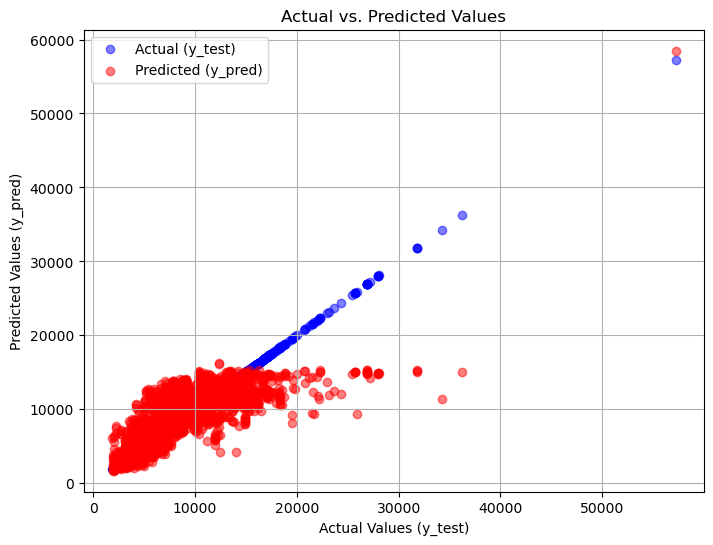

In [128]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test, c='blue', marker='o', alpha=0.5, label='Actual (y_test)')
plt.scatter(y_test, y_pred, c='red', marker='o', alpha=0.5, label='Predicted (y_pred)')
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.grid(True)
plt.show()

# KNN REGESSOR:

In [130]:
from sklearn.neighbors import KNeighborsRegressor
KNN=KNeighborsRegressor(n_neighbors=5)

In [131]:
KNN.fit(x_train,y_train)

KNeighborsRegressor()

In [132]:
y_predict=KNN.predict(x_test)

# Model Evaluation:

In [133]:
#R2_Sccore
knn_r2=r2_score(y_test,y_pred)
knn_r2

0.6255110355218592

In [134]:
# Adjust R2_score
adj_r2=1-(1-knn_r2)*(3205-1)/(3205-28-1)
adj_r2

0.6222094955327572

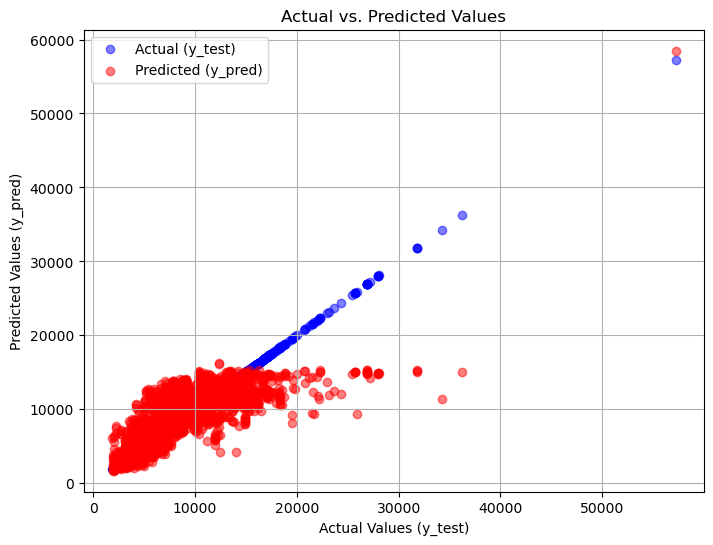

In [135]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test, c='blue', marker='o', alpha=0.5, label='Actual (y_test)')
plt.scatter(y_test, y_pred, c='red', marker='o', alpha=0.5, label='Predicted (y_pred)')
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.grid(True)
plt.show()

# Support vector Regressor:

In [136]:
from sklearn.svm import SVR
SVM=SVR()

In [137]:
SVM.fit(x_train,y_train)

SVR()

In [138]:
y_predict=SVM.predict(x_test)

# Model Evaluation:

In [139]:
#R2_Score
svm_r2=r2_score(y_test,y_pred)
svm_r2

0.6255110355218592

In [140]:
# Adjust R2_score
adj_r2=1-(1-svm_r2)*(3205-1)/(3205-28-1)
adj_r2

0.6222094955327572

# Cross Validation:

In [83]:
from sklearn.model_selection import cross_val_score
# Perform cross-validation
scores = cross_val_score(SVM, x, y, cv=5, scoring='r2')

print("Cross-validation R2 scores:", scores)
print("Mean R2 Score:", scores.mean())
print("Standard Deviation of R2 Score:", scores.std())

Cross-validation R2 scores: [0.14791817 0.14506096 0.16446203 0.17064719 0.15630513]
Mean R2 Score: 0.1568786943251052
Standard Deviation of R2 Score: 0.009668063274901008


# Hyperparametric Tunning for SVM:

In [84]:
#We use GridSearch CV
from sklearn.model_selection import RandomizedSearchCV
#defining Hyperparameter
param_grid={'C':[0.001,0.01,0.1,2,5,6,70,80],'kernel':['linear'],'epsilon': [0.01, 0.1, 0.2, 0.5, 1.0]}
model=SVR()
grid=RandomizedSearchCV(model,param_grid,verbose=2,scoring='r2',cv=5)
grid.fit(x,y)
print(grid.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ...................C=6, epsilon=0.01, kernel=linear; total time=  40.5s
[CV] END ...................C=6, epsilon=0.01, kernel=linear; total time=  43.4s
[CV] END ...................C=6, epsilon=0.01, kernel=linear; total time=  44.0s
[CV] END ...................C=6, epsilon=0.01, kernel=linear; total time=  37.9s
[CV] END ...................C=6, epsilon=0.01, kernel=linear; total time=  42.8s
[CV] END ...................C=70, epsilon=0.2, kernel=linear; total time= 8.2min
[CV] END ...................C=70, epsilon=0.2, kernel=linear; total time= 4.4min
[CV] END ...................C=70, epsilon=0.2, kernel=linear; total time= 6.5min
[CV] END ...................C=70, epsilon=0.2, kernel=linear; total time= 8.6min
[CV] END ...................C=70, epsilon=0.2, kernel=linear; total time= 7.2min
[CV] END ..................C=0.1, epsilon=1.0, kernel=linear; total time=   5.1s
[CV] END ..................C=0.1, epsilon=1.0, k

In [85]:
SVM=SVR(kernel='linear',epsilon=1.0,C=70)

In [89]:
SVM.fit(x_train,y_train)

SVR(C=70, epsilon=1.0, kernel='linear')

In [91]:
y_pred=SVM.predict(x_test)

# Model Evaluation:

In [92]:
#R2_Score
svm_r2=r2_score(y_test,y_pred)
svm_r2

0.5522413254522531

In [93]:
# Adjust R2_score
adj_r2=1-(1-svm_r2)*(3205-1)/(3205-28-1)
adj_r2

0.5482938308403712

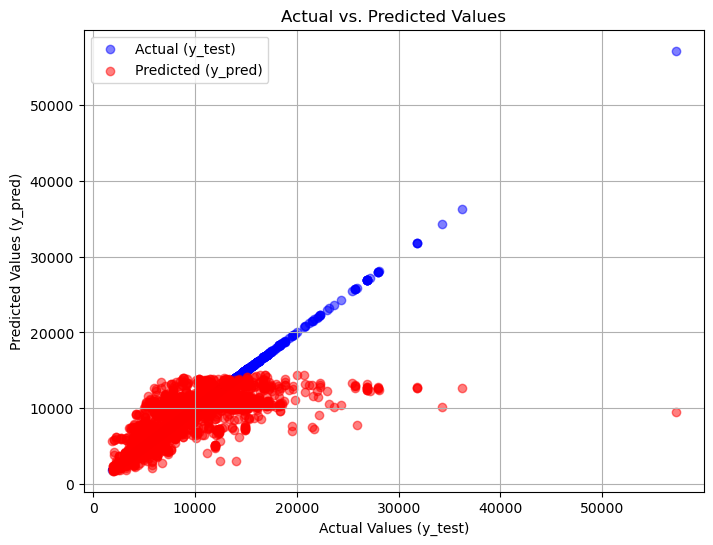

In [94]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test, c='blue', marker='o', alpha=0.5, label='Actual (y_test)')
plt.scatter(y_test, y_pred, c='red', marker='o', alpha=0.5, label='Predicted (y_pred)')
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.grid(True)
plt.show()

# Decision Tree: 

In [64]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()

In [65]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [66]:
y_predict=dt.predict(x_test)

# Model Evaluation: 

In [70]:
#R2_score
dt_r2_score=r2_score(y_test,y_predict)
dt_r2_score

0.7515117244609879

In [71]:
#Adjust R2_score
adj_r2=1-(1-dt_r2_score)*(3205-1)/(3205-28-1)
adj_r2

0.7493210217799136

# HyperParametric tunning for Decision Tree Regressor: 

In [73]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}
dt_regressor = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(dt_regressor, param_grid, scoring='r2', cv=5, verbose=2)
grid_search.fit(x, y)
best_params = grid_search.best_params_
print("Best Hyperparameters:")
print(best_params)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[

In [74]:
dtreg=DecisionTreeRegressor(max_depth= 10,max_features='auto',min_samples_leaf=2,min_samples_split=2)

In [75]:
dtreg.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=10, max_features='auto', min_samples_leaf=2)

In [77]:
y_pred=dtreg.predict(x_test)

# Model Evaluation:

In [78]:
# R2_score
dt_r2_score=r2_score(y_test,y_pred)
dt_r2_score

0.7625220029326318

In [79]:
#Adjust R2_Score
adj_r2=1-(1-dt_r2_score)*(3205-1)/(3205-28-1)
adj_r2

0.760428368197781

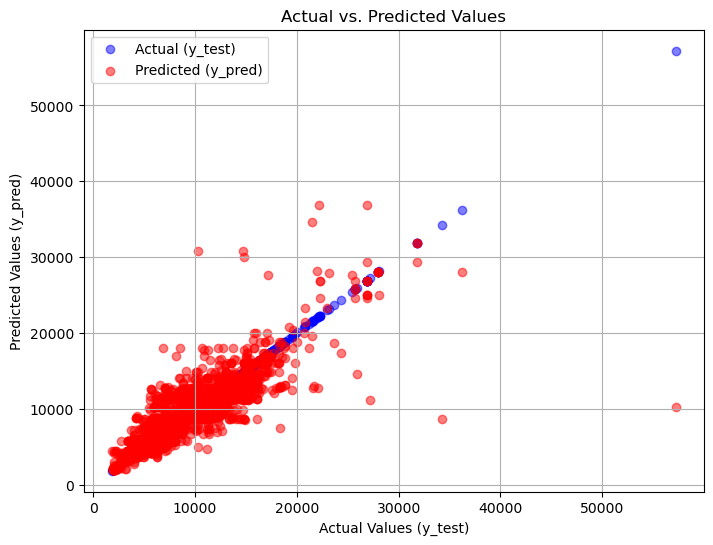

In [80]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test, c='blue', marker='o', alpha=0.5, label='Actual (y_test)')
plt.scatter(y_test, y_pred, c='red', marker='o', alpha=0.5, label='Predicted (y_pred)')
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.grid(True)
plt.show()

# Random Forest Regressor:

In [81]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()

In [82]:
RF.fit(x_train,y_train)

RandomForestRegressor()

In [83]:
y_pred=RF.predict(x_test)

# Model Evaluation:

In [84]:
#R2_Score
rf_r2_score=r2_score(y_test,y_pred)
rf_r2_score

0.8213951101820828

In [85]:
#Adjust_r2_score
adj_r2=1-(1-rf_r2_score)*(3205-1)/(3205-28-1)
adj_r2

0.8198205078789021

# Hyper Parametric tunning for Random Forest Regressor:

In [86]:
#initializie the libraries and parameters
from sklearn.model_selection import RandomizedSearchCV
n_estimators=[int(x) for x in np.linspace(start=200,stop=2000,num=10)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(start=10,stop=100,num=11)]
max_depth.append(None)
min_samples_split=[2,5,10]
min_samples_leaf=[1,2,4]
bootstrap=[True,False]

In [88]:
random_grid={'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth,'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,'bootstrap':bootstrap}
rf_ht=RandomForestRegressor(random_state=42)
rf_cv = RandomizedSearchCV(estimator=RF, param_distributions=random_grid, n_iter=100, cv=3, verbose=1,
                            random_state=42, n_jobs=-1, scoring='r2')
rf_cv.fit(x,y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 19, 28, 37, 46, 55,
                                                      64, 73, 82, 91, 100,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='r2', verbose=1)

In [89]:
rf_best_params=rf_cv.best_params_
print(f"best_params:{rf_best_params}")

best_params:{'n_estimators': 1800, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 28, 'bootstrap': False}


In [90]:
rfr1=RandomForestRegressor(n_estimators=1800,max_features='sqrt',max_depth=28,min_samples_split=10,
                           min_samples_leaf=1,random_state=42,bootstrap=False)

In [92]:
rfr1.fit(x_train,y_train)

RandomForestRegressor(bootstrap=False, max_depth=28, max_features='sqrt',
                      min_samples_split=10, n_estimators=1800, random_state=42)

In [93]:
y_pred=rfr1.predict(x_test)

# Model Evaluation:

In [94]:
#R2_Score
rf_r2_score=r2_score(y_test,y_pred)
rf_r2_score

0.842248706080111

In [95]:
#Adjust_r2_score
adj_r2=1-(1-rf_r2_score)*(3205-1)/(3205-28-1)
adj_r2

0.840857951599709

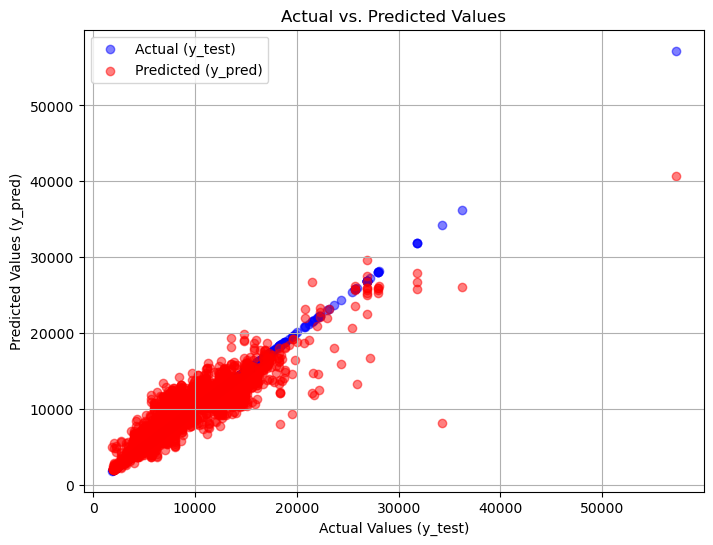

In [96]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test, c='blue', marker='o', alpha=0.5, label='Actual (y_test)')
plt.scatter(y_test, y_pred, c='red', marker='o', alpha=0.5, label='Predicted (y_pred)')
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.grid(True)
plt.show()

# Gradient Boosting:

In [97]:
from sklearn.ensemble import GradientBoostingRegressor
GB=GradientBoostingRegressor()

In [98]:
GB.fit(x_train,y_train)

GradientBoostingRegressor()

In [99]:
y_pred=GB.predict(x_test)

# Model Evaluation:

In [100]:
#R2_Score
gb_r2_score=r2_score(y_test,y_pred)
gb_r2_score

0.7966806516603102

In [101]:
#Adjust_r2_score
adj_r2=1-(1-gb_r2_score)*(3205-1)/(3205-28-1)
adj_r2

0.7948881637026555

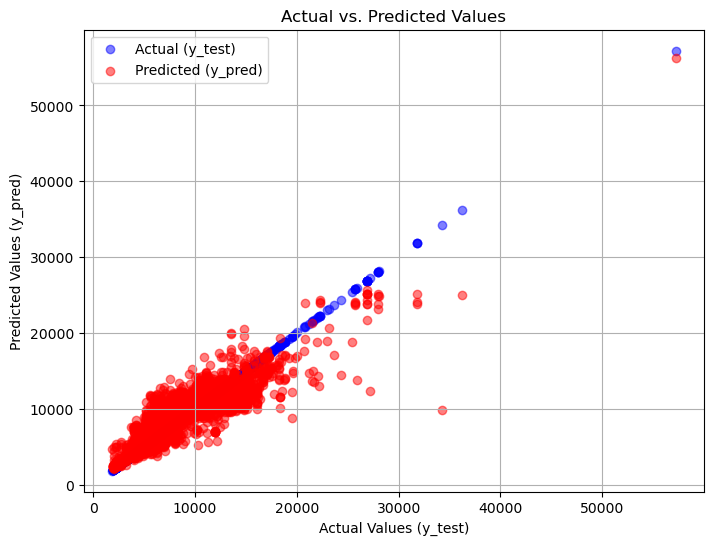

In [102]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test, c='blue', marker='o', alpha=0.5, label='Actual (y_test)')
plt.scatter(y_test, y_pred, c='red', marker='o', alpha=0.5, label='Predicted (y_pred)')
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.grid(True)
plt.show()

# XG Boosting:

In [103]:
import xgboost
from xgboost import XGBRegressor
xgb=XGBRegressor()

In [105]:
xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [106]:
y_pred=xgb.predict(x_test)

# Model Evaluation:

In [107]:
#R2_Score
xg_r2_score=r2_score(y_test,y_pred)
xg_r2_score

0.8423050671715269

In [108]:
#Adjust_r2_score
adj_r2=1-(1-xg_r2_score)*(3205-1)/(3205-28-1)
adj_r2

0.8409148095773211

# Hyperparametric Tunning for XG Boosting:

In [110]:
from sklearn.model_selection import RandomizedSearchCV
param_grid={ 'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}
xbg2=XGBRegressor(random_state=42)
xgb_cv=RandomizedSearchCV(estimator=xbg2,param_distributions=param_grid,n_iter=100,cv=3,verbose=1,
                          random_state=42,n_jobs=-1,scoring='r2')
xgb_cv.fit(x,y)
cv_best_params=xgb_cv.best_params_
print(f"Best paramters: {cv_best_params})")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'reg_lambda': 6.4, 'reg_alpha': 0.4, 'n_estimators': 65, 'max_depth': 10, 'learning_rate': 0.2, 'gamma': 3.2})


In [111]:
xgb2=XGBRegressor(reg_lambda=6.4,reg_alpha=0.4,n_estimators=65,max_depth=10,learning_rate=0.2,gamma=3.2,random_state=42)

In [112]:
xgb2.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=3.2, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=65, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [113]:
y_pred=xgb2.predict(x_test)

# Model Evaluation:

In [114]:
#R2_Score
xgb_r2_score=r2_score(y_test,y_pred)
xgb_r2_score

0.854989949757621

In [115]:
#Adjust_r2_score
adj_r2=1-(1-xgb_r2_score)*(3205-1)/(3205-28-1)
adj_r2

0.8537115236219829

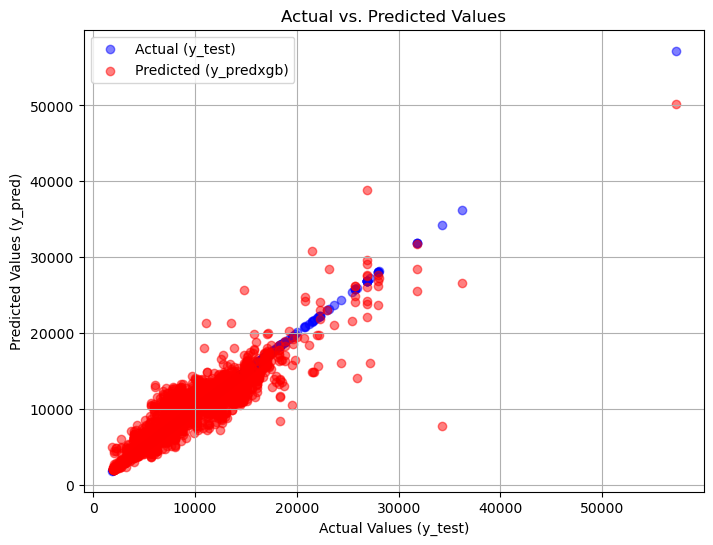

In [116]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test, c='blue', marker='o', alpha=0.5, label='Actual (y_test)')
plt.scatter(y_test, y_pred, c='red', marker='o', alpha=0.5, label='Predicted (y_predxgb)')
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.grid(True)
plt.show()

# Final Report:

In [141]:
scores=[r2score,knn_r2,svm_r2,dt_r2_score,rf_r2_score,gb_r2_score,xgb_r2_score]
algorithms=['LinearRegression','KNN','SVM','DecisionTree','RandomForest','GradientBoosting','XGBoosting']
for i in range(len(algorithms)):
    print("The R2 Score acheived using " + algorithms[i] + ' is: ' + str(scores[i])+"%")

The R2 Score acheived using LinearRegression is: 0.6255110355218592%
The R2 Score acheived using KNN is: 0.6255110355218592%
The R2 Score acheived using SVM is: 0.6255110355218592%
The R2 Score acheived using DecisionTree is: 0.7625220029326318%
The R2 Score acheived using RandomForest is: 0.842248706080111%
The R2 Score acheived using GradientBoosting is: 0.7966806516603102%
The R2 Score acheived using XGBoosting is: 0.854989949757621%


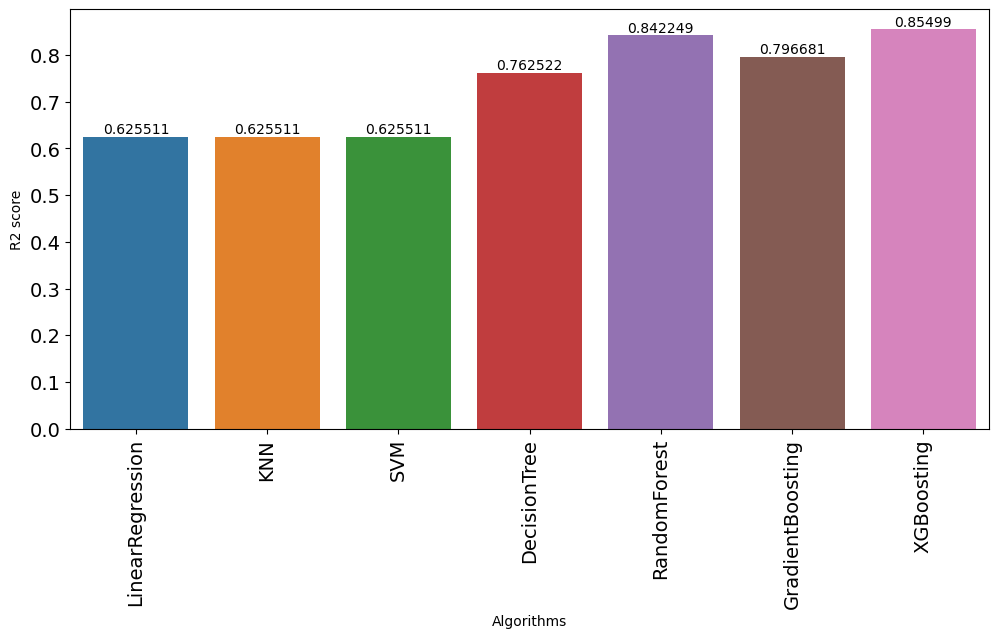

In [142]:
plt.figure(figsize=(10,6))
plt.xlabel("Algorithms")
plt.ylabel("R2 score")
ax=sns.barplot(x=algorithms,y=scores)
for label in ax.containers:
    ax.bar_label(label)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.tick_params(labelsize=14)

# Summary:

"After trying various models, the XGBoost model achieved an R2 score of 86%, indicating that it is the superior model."

# Conclusion:

# Challenges Faced in Data and Techniques:

# Techniques used for Flight Fare Prediction: 

# Conclusion: